In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
X = pd.read_csv('/Users/parvathyrajan/Desktop/Course Work - Traffic Sign DataSet/Complete Data Set - Training/x_train_all.csv')
y = pd.read_csv('/Users/parvathyrajan/Desktop/Course Work - Traffic Sign DataSet/Complete Data Set - Training/y_train_all.csv')

In [3]:
X.shape

(9690, 2304)

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


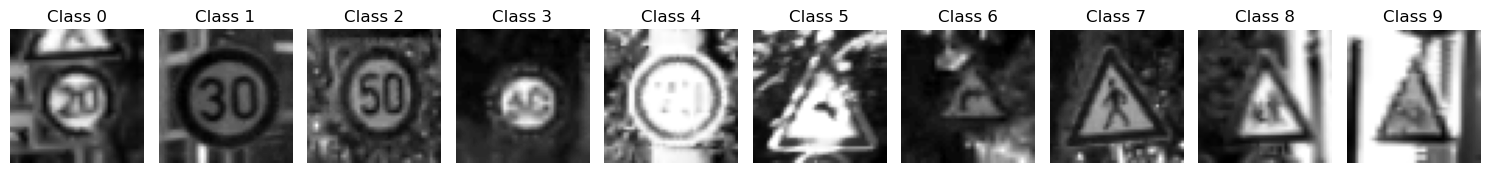

In [41]:
# Convert the dataframes to numpy arrays
X_num = X.to_numpy()
y_num = y.to_numpy().flatten()

# Display one image from each class
unique_classes = np.unique(y_num)
fig, axes = plt.subplots(1, len(unique_classes), figsize=(15, 2))

for i, cls in enumerate(unique_classes):
    index = np.where(y == cls)[0][0]  # Find the index of the first occurrence of each class
    image = X_num[index].reshape(48, 48)  # Reshape the image to 48x48 pixels
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Class {int(cls)}')

plt.tight_layout()
plt.show()

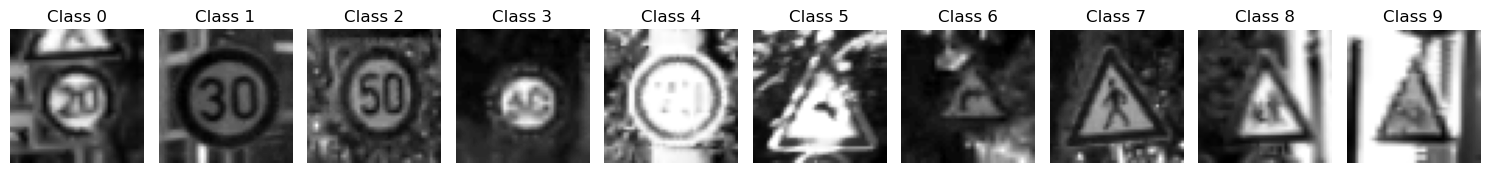

In [69]:
# Class label	Traffic Sign 
# 0	speed limit 20
# 1	speed limit 30
# 2	speed limit 50
# 3	speed limit 60
# 4	speed limit 70
# 5	left turn
# 6	right turn
# 7	beware pedestrian crossing 
# 8	beware children
# 9	beware cycle route ahead


In [70]:
# Check for missing values in the features and labels
missing_features = X.isnull().sum().sum()
missing_labels = y.isnull().sum().sum()

missing_features, missing_labels

(0, 0)

In [57]:
# Normalize the data to range [0, 1]
x_train_normalized = X / 255

In [59]:
x_train_normalized.head(3)

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.305882,0.301961,0.298039,0.321569,0.341176,0.360784,0.407843,0.466667,0.458824,0.470588,...,0.341176,0.309804,0.282353,0.298039,0.325490,0.372549,0.388235,0.384314,0.372549,0.368627
1,0.286275,0.294118,0.309804,0.305882,0.298039,0.294118,0.349020,0.419608,0.521569,0.490196,...,0.376471,0.364706,0.333333,0.301961,0.270588,0.286275,0.325490,0.392157,0.396078,0.396078
2,0.282353,0.294118,0.309804,0.301961,0.317647,0.349020,0.411765,0.427451,0.337255,0.352941,...,0.384314,0.372549,0.345098,0.313725,0.286275,0.278431,0.290196,0.313725,0.349020,0.372549


### `train_test_split`

In [46]:
# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(x_train_normalized, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
y_pred = gnb.predict(X_test)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy.round(3))
print(class_report)


0.233
              precision    recall  f1-score   support

           0       0.14      0.71      0.23        42
           1       0.40      0.17      0.24       444
           2       0.44      0.18      0.26       450
           3       0.43      0.22      0.29       282
           4       0.52      0.16      0.25       396
           5       0.08      0.36      0.13        42
           6       0.09      0.72      0.16        72
           7       0.13      0.62      0.21        48
           8       0.55      0.21      0.31       108
           9       0.37      0.30      0.33        54

    accuracy                           0.23      1938
   macro avg       0.32      0.37      0.24      1938
weighted avg       0.42      0.23      0.25      1938



### `StratifiedKFold`

In [47]:
# Cross-validation with Naive Bayes
cv = StratifiedKFold(n_splits=10)
cross_val_scores = cross_val_score(GaussianNB(), x_train_normalized, y.values.ravel(), cv=cv)

cross_val_scores.mean().round(3), cross_val_scores.std().round(3)


(0.187, 0.05)

### Instead of normalization, we try Standardisation

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_standard = scaler.fit_transform(X)


In [49]:
x_standard = pd.DataFrame(x_standard)

In [50]:
x_standard.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,-0.150399,-0.162027,-0.172519,-0.097642,-0.036323,0.027781,0.183140,0.376523,0.348175,0.382116,...,0.225885,0.109520,0.009264,0.083325,0.205600,0.404813,0.477748,0.472884,0.432761,0.418985
1,-0.214900,-0.187858,-0.133733,-0.149259,-0.178381,-0.192213,-0.011459,0.220836,0.555810,0.446924,...,0.363572,0.323470,0.208044,0.098676,-0.010175,0.063870,0.228803,0.504234,0.527348,0.529216
2,-0.227801,-0.187858,-0.133733,-0.162163,-0.113809,-0.011042,0.196113,0.246784,-0.054117,-0.006728,...,0.394169,0.354035,0.253917,0.144730,0.051475,0.032876,0.088772,0.190735,0.338174,0.434732
3,-0.292303,-0.252435,-0.198377,-0.123451,0.041163,0.221892,0.260979,0.078123,-0.274729,0.122887,...,0.608349,0.308188,0.238626,0.175433,0.113125,0.048373,0.026536,0.065335,0.212059,0.324501
4,-0.202000,-0.200774,-0.211306,-0.226683,-0.165466,-0.036923,0.183140,0.246784,-0.080071,-0.097459,...,0.424766,0.399881,0.422115,0.451757,0.452199,0.311828,0.151008,-0.028715,0.007121,0.072545


### Applying standardized data to Gaussian Naive Bayes model

In [51]:
# Splitting the data into training and validation sets
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(x_standard, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_standard, y_train_standard.values.ravel())
y_pred_standard = gnb.predict(X_test_standard)

# Calculating the metrics
accuracy = accuracy_score(y_test_standard, y_pred_standard)
class_report = classification_report(y_test, y_pred)

print(accuracy.round(3))
print(class_report)


0.233
              precision    recall  f1-score   support

           0       0.14      0.71      0.23        42
           1       0.40      0.17      0.24       444
           2       0.44      0.18      0.26       450
           3       0.43      0.22      0.29       282
           4       0.52      0.16      0.25       396
           5       0.08      0.36      0.13        42
           6       0.09      0.72      0.16        72
           7       0.13      0.62      0.21        48
           8       0.55      0.21      0.31       108
           9       0.37      0.30      0.33        54

    accuracy                           0.23      1938
   macro avg       0.32      0.37      0.24      1938
weighted avg       0.42      0.23      0.25      1938



## Feature Selection

### 3. Random Forest

Here We decided to create a Random Forest model, for sure it's accuracy is way higher, but it's not the main point.

Main point is to use `feature_importances_` method from `RandomForestClassifier` class. This is also one more way of feature selection.

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.values.ravel())

y_pred_rf = rf_model.predict(X_test)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(accuracy.round(3))
print(class_report)

0.978
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.96      0.99      0.98       444
           2       0.98      0.98      0.98       450
           3       0.99      0.98      0.98       282
           4       0.99      0.98      0.99       396
           5       1.00      0.88      0.94        42
           6       0.99      0.96      0.97        72
           7       1.00      1.00      1.00        48
           8       0.96      0.97      0.97       108
           9       1.00      0.98      0.99        54

    accuracy                           0.98      1938
   macro avg       0.99      0.96      0.97      1938
weighted avg       0.98      0.98      0.98      1938



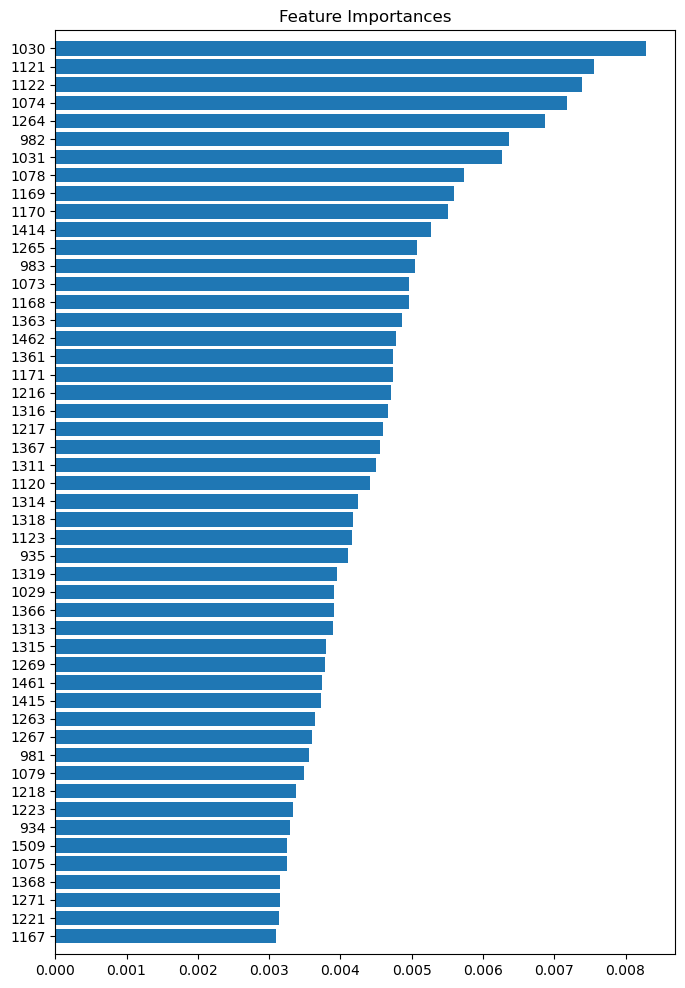

In [79]:
import matplotlib.pyplot as plt

# Extract feature importances
importances_rf = rf_model.feature_importances_

# Sort feature importances in descending order and get the indices
indices_rf = np.argsort(importances_rf)[::-1]

# Plot the top 'n' feature importances
n = 50  # for example, top 50 features
plt.figure(figsize=(8, 12))  # Adjusted the figure size for vertical orientation
plt.title("Feature Importances")
plt.barh(range(n), importances_rf[indices_rf[:n]], align="center")
plt.yticks(range(n), indices_rf[:n])
plt.ylim([-1, n])
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [80]:
# We tried different number of features and "150" is the most efficient number of features
X_rf = x_train_normalized[indices_rf[:150]]
X_rf.head()

KeyError: "None of [Int64Index([1030, 1121, 1122, 1074, 1264,  982, 1031, 1078, 1169, 1170,\n            ...\n            1464, 1222,  839, 1076, 1519,  842, 1469,  881,  838, 1128],\n           dtype='int64', length=150)] are in the [columns]"

#### Applying Gaussian Naive Bayes on dataset gotted from Random Forest model

In [ ]:
# Splitting the data into training and validation sets
X_train_rf, X_tes_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_rf, y_train_rf.values.ravel())
y_pred_rf = gnb.predict(X_tes_rf)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(accuracy.round(3))
print(class_report)


#### We can see that this method gives us the best accuracy

### 4. Catboost - Gradient Boosting

In [29]:
from catboost import CatBoostClassifier

cb_model = CatBoostClassifier(iterations=100, random_seed=42)

cb_model.fit(X_train, y_train)

y_pred_cb = cb_model.predict(X_test)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_cb)
class_report = classification_report(y_test, y_pred_cb)

print(accuracy.round(3))
print(class_report)

Learning rate set to 0.5
0:	learn: 1.6355457	total: 468ms	remaining: 46.3s
1:	learn: 1.3982543	total: 887ms	remaining: 43.5s
2:	learn: 1.2615429	total: 1.27s	remaining: 41.2s
3:	learn: 1.1235347	total: 1.67s	remaining: 40s
4:	learn: 1.0535007	total: 2.06s	remaining: 39.2s
5:	learn: 1.0105312	total: 2.46s	remaining: 38.5s
6:	learn: 0.9493483	total: 2.84s	remaining: 37.8s
7:	learn: 0.8846421	total: 3.24s	remaining: 37.2s
8:	learn: 0.8532674	total: 3.63s	remaining: 36.7s
9:	learn: 0.7858531	total: 4.02s	remaining: 36.1s
10:	learn: 0.7551665	total: 4.41s	remaining: 35.7s
11:	learn: 0.7127844	total: 4.8s	remaining: 35.2s
12:	learn: 0.6966177	total: 5.19s	remaining: 34.7s
13:	learn: 0.6709921	total: 5.58s	remaining: 34.3s
14:	learn: 0.6278381	total: 5.98s	remaining: 33.9s
15:	learn: 0.5852147	total: 6.37s	remaining: 33.4s
16:	learn: 0.5517065	total: 6.76s	remaining: 33s
17:	learn: 0.5304509	total: 7.14s	remaining: 32.5s
18:	learn: 0.5109464	total: 7.54s	remaining: 32.1s
19:	learn: 0.4980676	

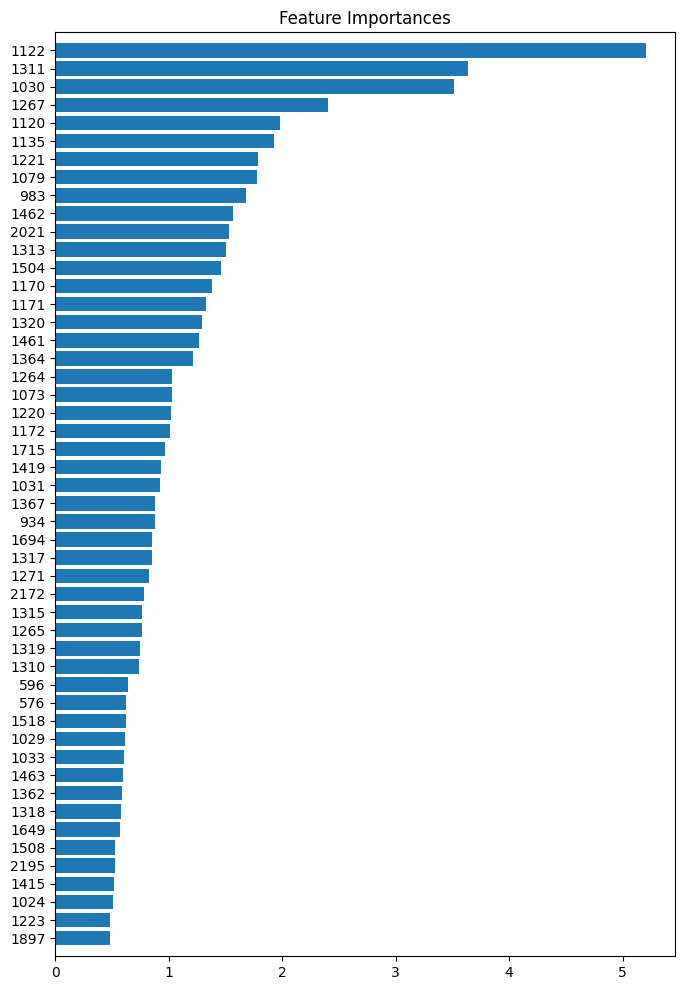

In [30]:
import matplotlib.pyplot as plt

# Extract feature importances
importances_cb = cb_model.get_feature_importance()

# Sort feature importances in descending order and get the indices
indices_cb = np.argsort(importances_cb)[::-1]

# Plot the top 'n' feature importances
n = 50  # for example, top 50 features
plt.figure(figsize=(8, 12))  # Adjusted the figure size for vertical orientation
plt.title("Feature Importances")
plt.barh(range(n), importances_cb[indices_cb[:n]], align="center")
plt.yticks(range(n), indices_cb[:n])
plt.ylim([-1, n])
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


In [31]:
# We tried different number of features and "100" is the most efficient number of features
X_cb = x_train_normalized[indices_cb[:100]]
X_cb.head()

,1122,1311,1030,1267,1120,1135,1221,1079,983,1462,...,2286,1215,269,1343,842,1601,1121,1610,621,1602
0,4.400000,5.141176,4.039216,4.968627,4.392157,4.450980,4.788235,4.231373,3.854902,5.733333,...,8.964706,4.764706,1.054902,5.266667,3.301961,6.278431,4.396078,6.313725,2.435294,6.282353
1,0.749020,0.835294,0.607843,0.776471,0.811765,0.623529,0.627451,0.552941,0.803922,0.600000,...,0.549020,0.862745,0.890196,0.368627,0.800000,0.443137,0.772549,0.925490,0.274510,0.588235
2,0.796078,0.443137,0.517647,0.800000,0.717647,0.658824,0.654902,0.509804,0.639216,0.521569,...,0.388235,0.486275,0.796078,0.337255,0.921569,0.380392,0.796078,0.929412,0.278431,0.392157
3,0.772549,0.705882,0.529412,0.698039,0.827451,0.517647,0.533333,0.611765,0.647059,0.607843,...,0.384314,0.768627,0.447059,0.325490,0.866667,0.423529,0.811765,0.913725,0.266667,0.513725
4,0.854902,0.666667,0.498039,0.541176,0.890196,0.450980,0.509804,0.568627,0.560784,0.670588,...,0.360784,0.807843,0.278431,0.317647,0.772549,0.313725,0.854902,0.850980,0.258824,0.388235


In [32]:
# Splitting the data into training and validation sets
X_train_cb, X_tes_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y, test_size=0.2, stratify=y, random_state=42)

# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_cb, y_train_cb.values.ravel())
y_pred_cb = gnb.predict(X_tes_cb)

# Calculating the metrics
class_report = classification_report(y_test, y_pred_cb)

print(class_report)


              precision    recall  f1-score   support

           0       0.02      0.07      0.02        43
           1       0.67      0.47      0.55       444
           2       0.75      0.33      0.45       450
           3       0.34      0.77      0.47       282
           4       0.67      0.07      0.12       396
           5       0.82      0.21      0.34        42
           6       0.27      0.58      0.37        72
           7       0.50      0.52      0.51        48
           8       0.84      0.49      0.62       108
           9       0.16      0.81      0.27        54

    accuracy                           0.40      1939
   macro avg       0.50      0.43      0.37      1939
weighted avg       0.60      0.40      0.40      1939



### 5. PCA

In [19]:
from sklearn.decomposition import PCA

# Exacly this number of components gave the best F1-score
n_components=175
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train_standard)
X_test_pca = pca.transform(X_test_standard)


The explained variance in PCA provides insight into the amount of information (or variance) that is captured by each principal component and by the selected components combined.

In [20]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Each Principal Component: {explained_variance}")
print(f"Total Variance Explained by 100 Principal Components: {np.sum(explained_variance)}")

Explained Variance by Each Principal Component: [4.88586265e-01 1.71432799e-01 4.49330910e-02 2.93358297e-02
 2.86194701e-02 1.95020599e-02 1.50290008e-02 1.27991209e-02
 9.97111190e-03 8.97419541e-03 7.59837033e-03 6.83583821e-03
 6.20343785e-03 5.60499000e-03 5.06099668e-03 4.59249627e-03
 4.48512991e-03 4.11185410e-03 3.99399078e-03 3.77663150e-03
 3.36606392e-03 2.78186116e-03 2.72458422e-03 2.63795564e-03
 2.39286005e-03 2.33033296e-03 2.24143551e-03 2.19340147e-03
 2.10163679e-03 1.92409861e-03 1.84009501e-03 1.78311629e-03
 1.76137258e-03 1.68326062e-03 1.60796507e-03 1.54114760e-03
 1.53206651e-03 1.44873157e-03 1.36372478e-03 1.31653618e-03
 1.29156256e-03 1.24060364e-03 1.18347317e-03 1.16915449e-03
 1.14177696e-03 1.11576521e-03 1.09319054e-03 1.03734781e-03
 1.01796480e-03 9.83627995e-04 9.64028790e-04 9.38119524e-04
 8.83685928e-04 8.78204891e-04 8.44151034e-04 8.40432656e-04
 8.38324639e-04 8.29508822e-04 7.91212523e-04 7.82251851e-04
 7.52876332e-04 7.41000202e-04 7.0300

In [21]:
# Applying Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train.values.ravel())
y_pred_pca = gnb.predict(X_test_pca)

# Calculating the metrics
class_report_pca = classification_report(y_test, y_pred_pca)

print(class_report_pca)



# from sklearn.decomposition import PCA

# # Exacly this number of components gave the best F1-score
# n_components=175
# pca = PCA(n_components)
# X_train_pca = pca.fit_transform(X_train_standard)
# X_test_pca = pca.transform(X_test_standard)


              precision    recall  f1-score   support

           0       0.57      0.40      0.47        42
           1       0.53      0.37      0.44       444
           2       0.53      0.21      0.30       450
           3       0.44      0.68      0.54       282
           4       0.54      0.72      0.62       396
           5       0.84      0.50      0.63        42
           6       0.52      0.79      0.63        72
           7       1.00      0.69      0.81        48
           8       0.27      0.54      0.36       108
           9       0.34      0.43      0.38        54

    accuracy                           0.49      1938
   macro avg       0.56      0.53      0.52      1938
weighted avg       0.52      0.49      0.47      1938



## Final evaluation of the Gaussian Naive Bayes model on the chosen dataset with all metrics

#### We chose the dataset from Catboost model as the final one for evaluating the model

In [23]:
# Applying Gaussian Naive Bayes to the PCA dataset
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train.values.ravel())
y_pred_pca = gnb.predict(X_test_pca)

# Calculating the metrics
class_report_pca = classification_report(y_test, y_pred_pca)

print(class_report_pca)


              precision    recall  f1-score   support

           0       0.57      0.40      0.47        42
           1       0.53      0.37      0.44       444
           2       0.53      0.21      0.30       450
           3       0.44      0.68      0.54       282
           4       0.54      0.72      0.62       396
           5       0.84      0.50      0.63        42
           6       0.52      0.79      0.63        72
           7       1.00      0.69      0.81        48
           8       0.27      0.54      0.36       108
           9       0.34      0.43      0.38        54

    accuracy                           0.49      1938
   macro avg       0.56      0.53      0.52      1938
weighted avg       0.52      0.49      0.47      1938



In [27]:

conf_mx = confusion_matrix(y_test, y_pred_pca)
conf_mx

array([[ 17,   3,   2,   6,   6,   0,   1,   0,   6,   1],
       [  5, 165,  23,  69, 104,   0,   0,   0,  61,  17],
       [  2,  61,  96, 136,  95,   0,   0,   0,  48,  12],
       [  1,  40,  19, 193,   5,   0,   4,   0,  15,   5],
       [  5,  36,  32,  17, 286,   0,   0,   0,  14,   6],
       [  0,   0,   0,   3,  13,  21,   1,   0,   4,   0],
       [  0,   0,   0,   3,   1,   0,  57,   0,   8,   3],
       [  0,   3,   0,   0,   1,   0,  10,  33,   0,   1],
       [  0,   2,   3,  10,   9,   0,  26,   0,  58,   0],
       [  0,   1,   6,   1,   5,   4,  10,   0,   4,  23]])

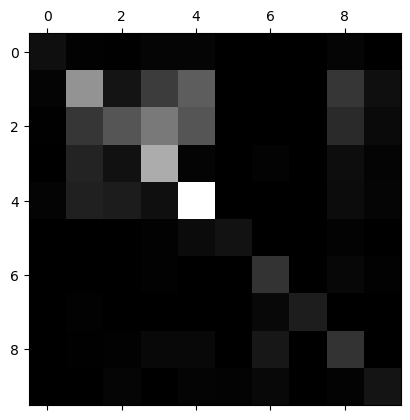

In [30]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [61]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

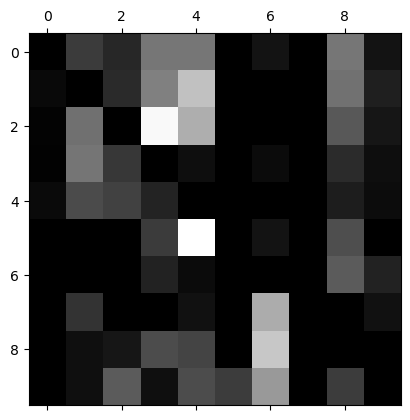

In [63]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.show()

In [ ]:
# Class label	Traffic Sign 
# 0	speed limit 20
# 1	speed limit 30
# 2	speed limit 50
# 3	speed limit 60
# 4	speed limit 70
# 5	left turn
# 6	right turn
# 7	beware pedestrian crossing 
# 8	beware children
# 9	beware cycle route ahead

In [71]:
conf_mx_rf = confusion_matrix(y_test, y_pred_rf)
conf_mx_rf

array([[ 38,   3,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 440,   3,   0,   1,   0,   0,   0,   0,   0],
       [  0,   5, 439,   3,   3,   0,   0,   0,   0,   0],
       [  0,   3,   3, 276,   0,   0,   0,   0,   0,   0],
       [  0,   5,   1,   0, 390,   0,   0,   0,   0,   0],
       [  0,   0,   2,   0,   1,  37,   0,   0,   2,   0],
       [  0,   1,   1,   0,   0,   0,  69,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48,   0,   0],
       [  0,   1,   0,   1,   0,   0,   1,   0, 105,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,  53]])

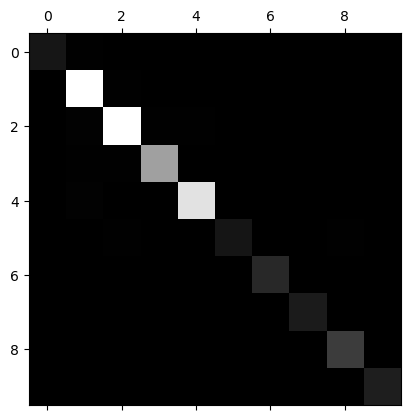

In [72]:
plt.matshow(conf_mx_rf, cmap=plt.cm.gray)
plt.show()

In [74]:
row_sums = conf_mx_rf.sum(axis=1, keepdims=True)
norm_conf_mx_rf = conf_mx_rf / row_sums

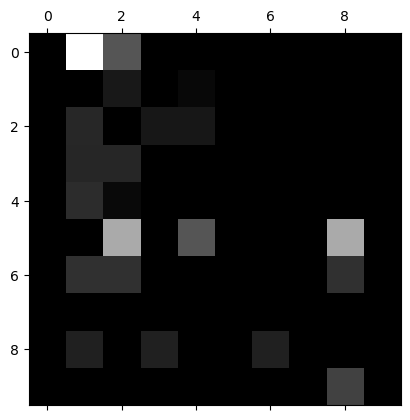

In [75]:
np.fill_diagonal(norm_conf_mx_rf, 0)
plt.matshow(norm_conf_mx_rf, cmap=plt.cm.gray)

plt.show()

In [ ]:
# Class label	Traffic Sign 
# 0	speed limit 20
# 1	speed limit 30
# 2	speed limit 50
# 3	speed limit 60
# 4	speed limit 70
# 5	left turn
# 6	right turn
# 7	beware pedestrian crossing 
# 8	beware children
# 9	beware cycle route ahead

In [77]:
cl_a, cl_b = 0, 1
X_aa = X_train[(y_train == cl_a) & (y_pred_rf == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_pred_rf == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_pred_rf == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_pred_rf == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

ValueError: Unable to coerce to Series, length must be 1: given 1938